<a href="https://colab.research.google.com/github/SamKay22/Data-Science-For-Beginners/blob/main/Samson_Kayode_Areo_Question_mini_project_module_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload('Dataset.csv')

Saving Dataset.csv to Dataset.csv/Dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

df = pd.read_csv('Dataset.csv/Dataset.csv')

In [ ]:
print(df.head())

print(df.info())

print(df.isnull().sum())

df = df.dropna()

print(f"Duplicates: {df.duplicated().sum()}")
df = df.drop_duplicates()

print(df.dtypes)


   OrderID        Date CustomerID  Product  Quantity  Price    Total
0        1  2024-04-12       C002    Phone         1    600   642.09
1        2  2024-12-14       C003   Laptop         2   1000  2098.39
2        3  2024-09-27       C017  Monitor         1    200   196.34
3        4  2024-04-16       C005    Phone         3    600  1955.86
4        5  2024-03-12       C017   Laptop         1   1000  1098.19
<class 'pandas.core.frame.DataFrame'>
Index: 185 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     185 non-null    int64  
 1   Date        185 non-null    object 
 2   CustomerID  185 non-null    object 
 3   Product     185 non-null    object 
 4   Quantity    185 non-null    int64  
 5   Price       185 non-null    int64  
 6   Total       185 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 11.6+ KB
None
OrderID       0
Date          0
CustomerID    0
Pr

          OrderID    Quantity        Price        Total
count  185.000000  185.000000   185.000000   185.000000
mean   100.908108    1.372973   670.270270   927.791730
std     57.272776    0.622342   298.606241   641.411469
min      1.000000    1.000000   100.000000    93.310000
25%     52.000000    1.000000   400.000000   553.710000
50%    101.000000    1.000000   600.000000   811.700000
75%    149.000000    2.000000  1000.000000  1065.360000
max    200.000000    3.000000  1000.000000  3293.240000

Value counts for Date:
 Date
2024-08-18    4
2024-05-10    3
2024-09-27    3
2024-12-25    2
2024-11-26    2
             ..
2024-08-21    1
2024-11-10    1
2024-06-28    1
2024-04-22    1
2024-10-21    1
Name: count, Length: 146, dtype: int64

Value counts for CustomerID:
 CustomerID
C003    15
C001    15
C016    15
C020    14
C017    13
C002    11
C005    10
C019    10
C008    10
C006     9
C004     8
C012     7
C018     7
C007     7
C014     7
C011     6
C009     6
C010     5
C013     5


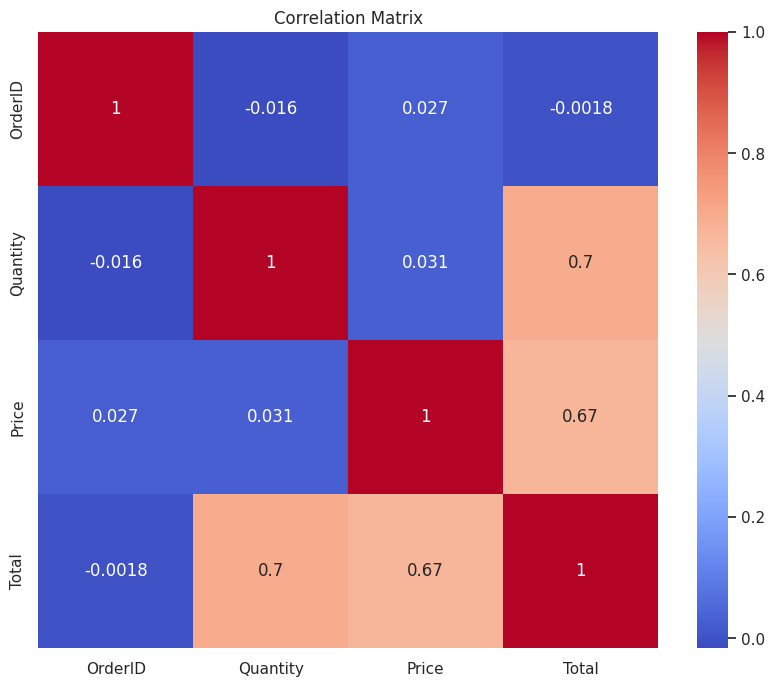

In [ ]:
print(df.describe())

for col in df.select_dtypes(include='object').columns:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


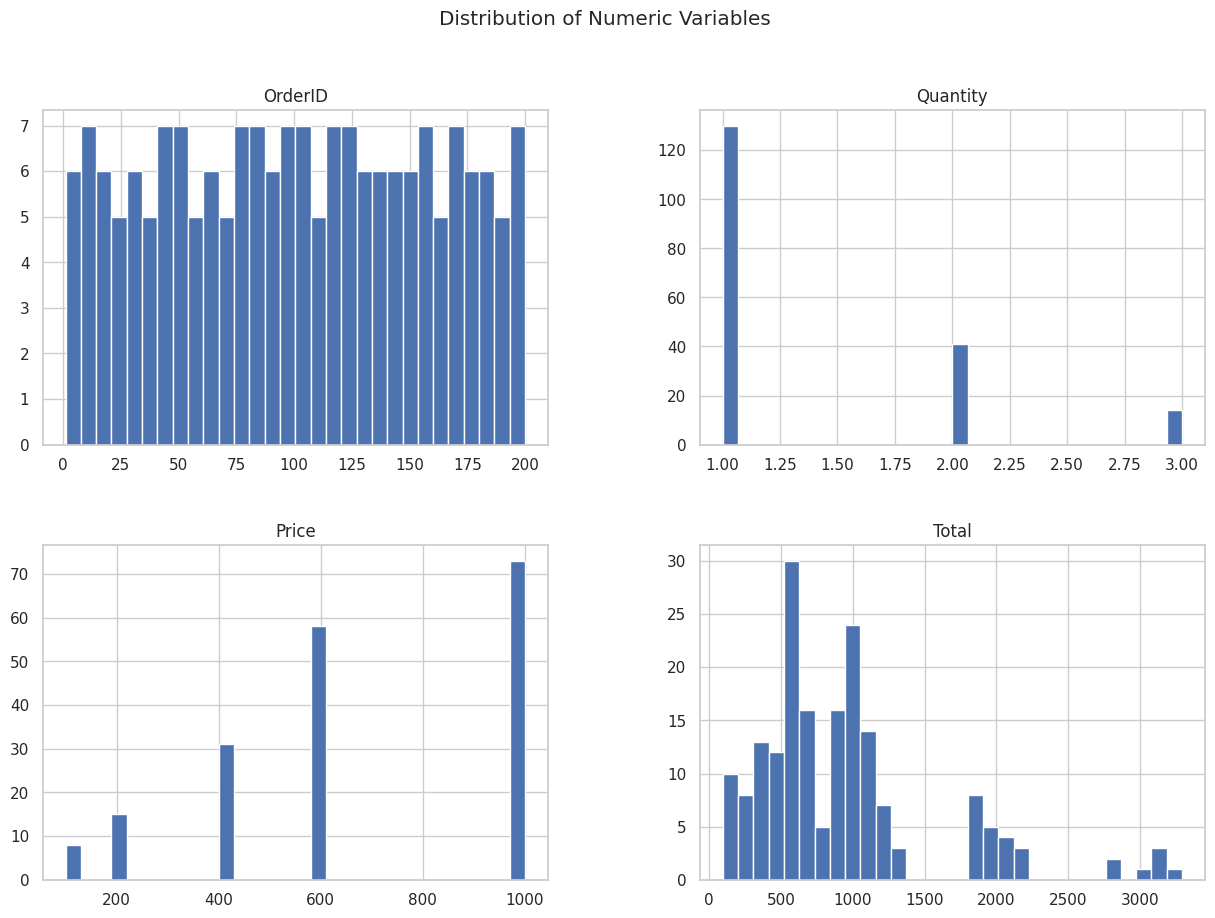

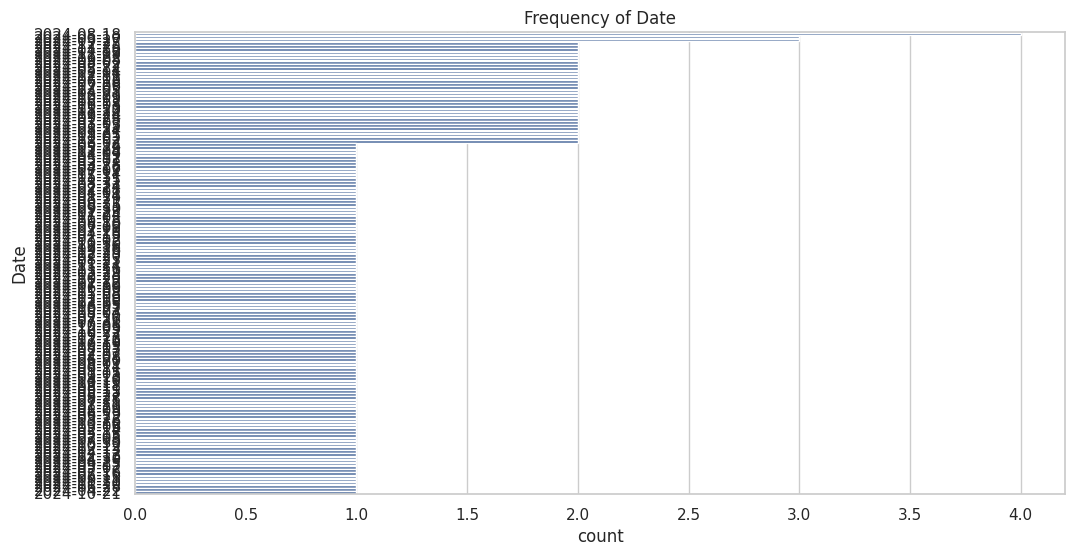

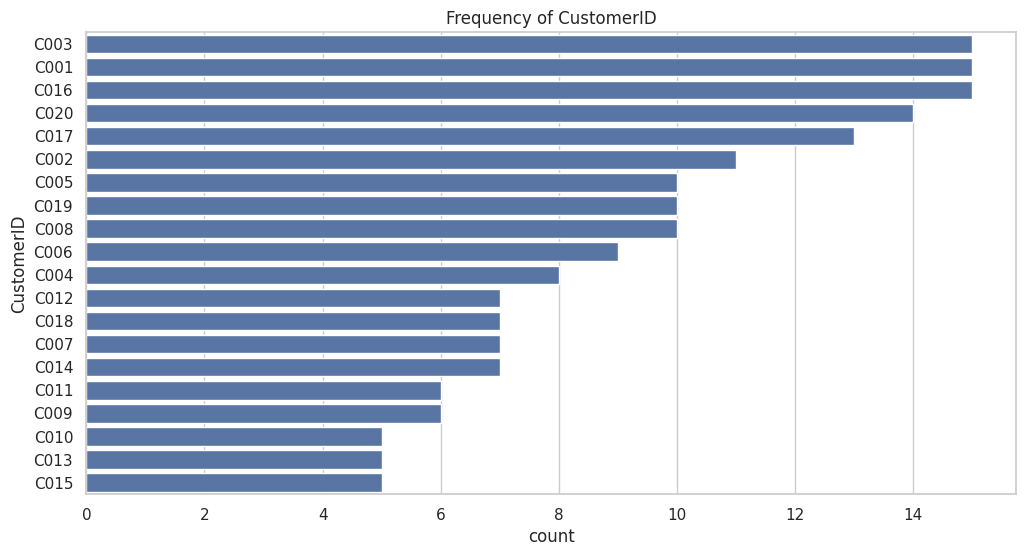

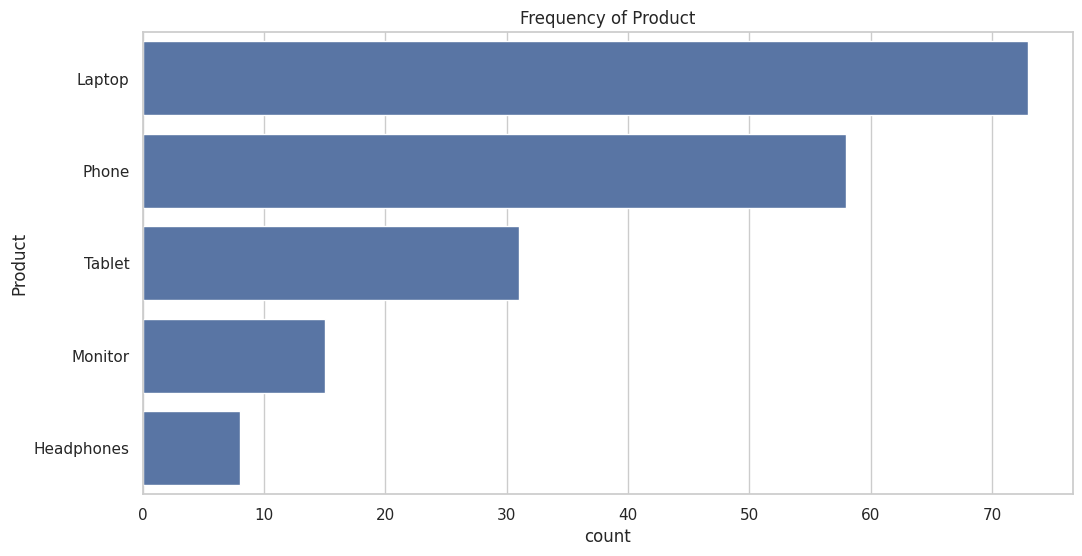

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribution of Numeric Variables")
plt.show()

# Bar plots for categorical variables
for col in df.select_dtypes(include='object').columns:
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.show()

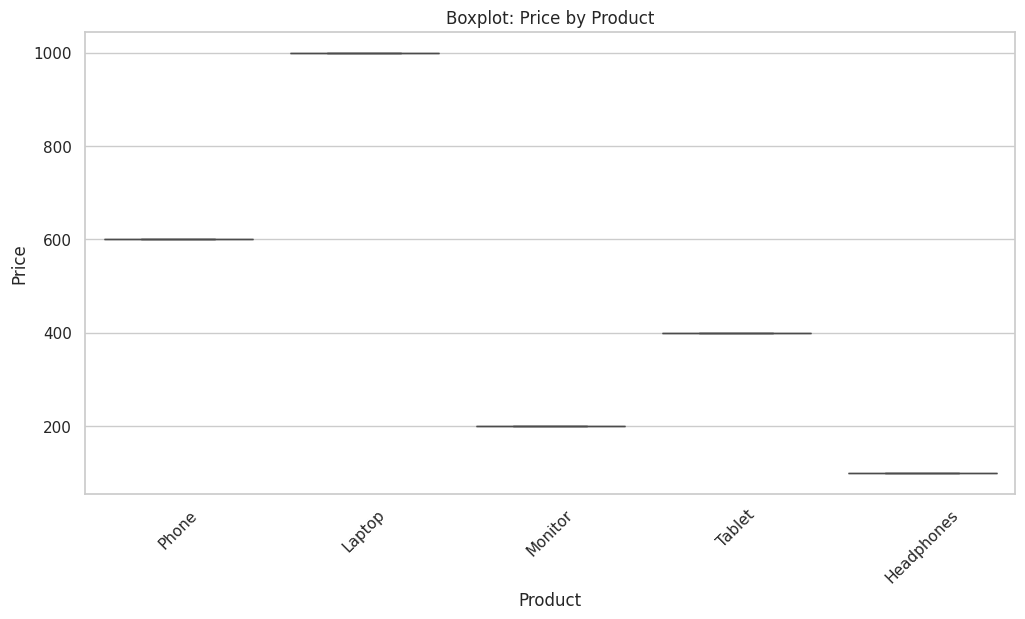

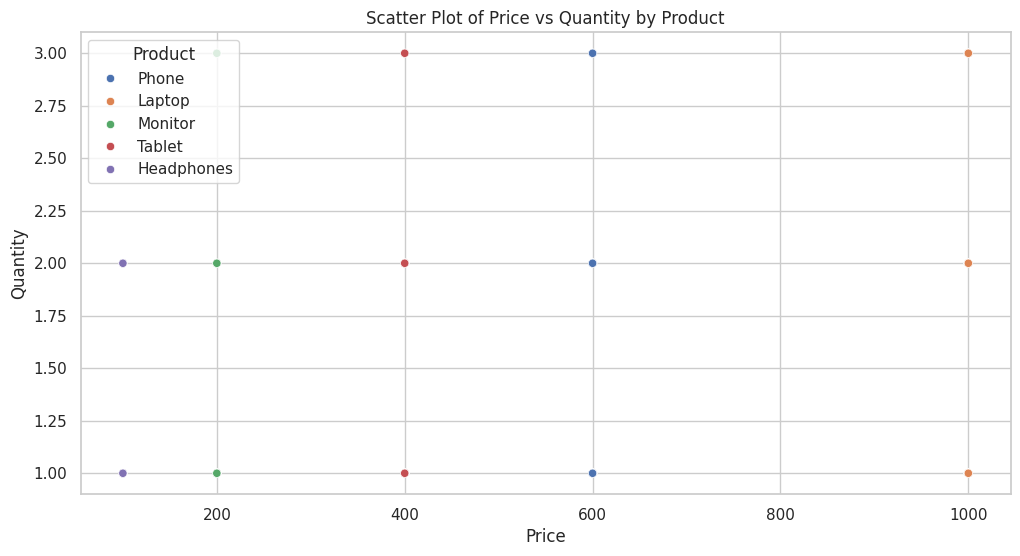

In [ ]:
sns.boxplot(x='Product', y='Price', data=df)
plt.title('Boxplot: Price by Product')
plt.xticks(rotation=45)
plt.show()

sns.scatterplot(x='Price', y='Quantity', data=df, hue='Product')
plt.title("Scatter Plot of Price vs Quantity by Product")
plt.show()

/tmp/ipython-input-13-3847294778.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Total'].resample('M').mean().plot()


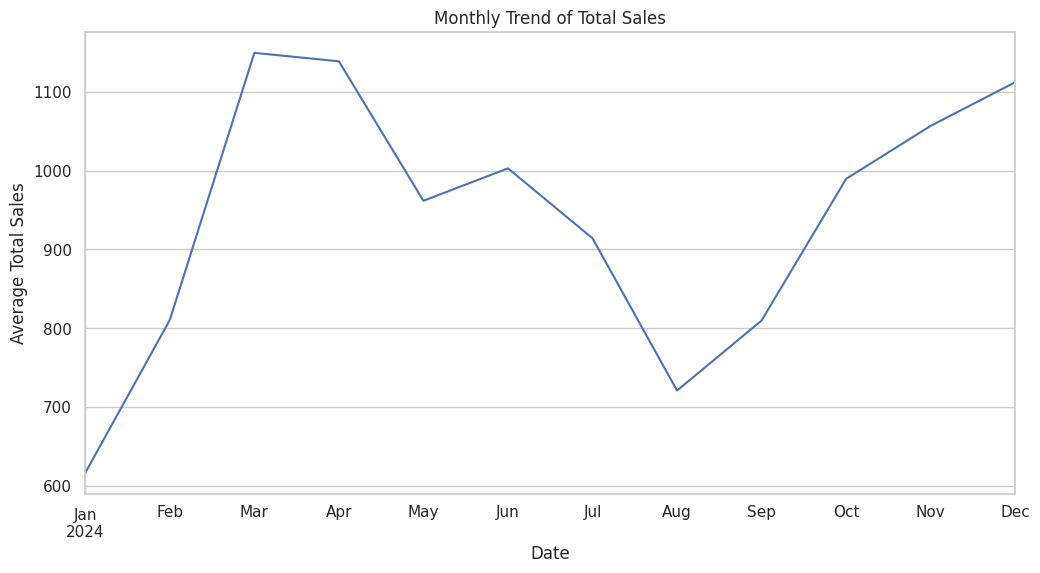

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


df['Total'].resample('M').mean().plot()
plt.title("Monthly Trend of Total Sales")
plt.ylabel("Average Total Sales")
plt.xlabel("Date")
plt.show()

In [ ]:
df.to_csv('cleaned_dataset.csv', index=False)